In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('/content/logoUPC.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# 2.1 Autor

ACLARACIO: Aquest quadern sobre exploració de dades s'ha confeccionat en base a les explicacions de P. Carmona: Data Analysis con Pandas. Primeros pasos.

A URL:(https://medium.com/ironhack/data-analysis-con-pandas-primeros-pasos-6234b1234b9c)

**Pere** **Ponsa** Sistemes d'Informació i Comunicació Industrial (SICI)

# 2.2 Pandas DataFrames i Series

In [ ]:
import pandas as pd

Les paraules Dataframe i Series equivalen a Taula i a Columnes.
Anem a crear un Dataframe amb les nostres dades.

In [ ]:
students = [{
    "Case Number":1,
    "name":"Jorge",
    "surname":"Perez",
    "age":24,
    "weight":50,
    "height":170
},
{
    "Case Number":2,
    "name":"Pepe",
    "surname":"Garcia",
    "age":27,
    "weight":60,
    "height":175
},
{
    "Case Number":3,
    "name":"Aria",
    "surname":"Gimenez",
    "age":26,
    "weight":70,
    "height":180
},
{
    "Case Number":4,
    "name":"Maria",
    "surname":"Ruz",
    "age":25,
    "weight":75,
    "height":181
},
{
    "Case Number":5,
     "name":"Luisa",
    "surname":"Perez",
    "age":24,
    "weight":50,
    "height":170
},
{
    "Case Number":6,
     "name":"Luisa",
    "surname":"Perez",
    "age":24,
    "weight":50,
    "height":170
},
{
    "Case Number":6,
     "name":"Luisa",
    "surname":"Perez",
    "age":24,
    "weight":50,
    "height":170
},
{
    "Case Number":7,
     "name":"Carlos",
    "surname":"Gonzalez",
    "age":23,
    "weight":52,
    "height":172
}]


# 2.3 DataFrame

In [ ]:
df = pd.DataFrame(students)

In [ ]:
df

,Case Number,name,surname,age,weight,height
0,1,Jorge,Perez,24,50,170
1,2,Pepe,Garcia,27,60,175
2,3,Aria,Gimenez,26,70,180
3,4,Maria,Ruz,25,75,181
4,5,Luisa,Perez,24,50,170
5,6,Luisa,Perez,24,50,170
6,6,Luisa,Perez,24,50,170
7,7,Carlos,Gonzalez,23,52,172


df fa una crida a tot el DataFrame senser.
df.head() fa una crida als 5 primers regisres

In [ ]:
df.head()

,Case Number,name,surname,age,weight,height
0,1,Jorge,Perez,24,50,170
1,2,Pepe,Garcia,27,60,175
2,3,Aria,Gimenez,26,70,180
3,4,Maria,Ruz,25,75,181
4,5,Luisa,Perez,24,50,170


Amb df.shape podem saber el nombre de files i columnes del DataFrame

In [ ]:
df.shape

(8, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Case Number  8 non-null      int64 
 1   name         8 non-null      object
 2   surname      8 non-null      object
 3   age          8 non-null      int64 
 4   weight       8 non-null      int64 
 5   height       8 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 512.0+ bytes


df.info() indica amb "non-null" els elements que no són zero
df.describe() també informa del DataFrame i df.describe() realitza estadística descriptiva bàsica (per a les variables numèriques). I percentils 25%, 50% i 75%.
El tractament estadístic dins de Python es pot fer des de diverses funcions dins de llibreries Pandas, Numpy o Scipy.

In [ ]:
df.describe()

,Case Number,age,weight,height
count,8.00000,8.00000,8.000000,8.000000
mean,4.25000,24.62500,57.125000,173.500000
std,2.12132,1.30247,10.162079,4.659859
min,1.00000,23.00000,50.000000,170.000000
25%,2.75000,24.00000,50.000000,170.000000
50%,4.50000,24.00000,51.000000,171.000000
75%,6.00000,25.25000,62.500000,176.250000
max,7.00000,27.00000,75.000000,181.000000


COMENTARI: El DataFrame que s'ha generat en aquest exemple no
presenta cap valor nul. En casos de falta de dades o valors nuls,
cal netegar el DataFrame abans de fer anàlisi o visualització, i es fan
servir instruccions del tipus .isnull() i .sum()

Observa què succeeix quan s'aplica les funcions
df.columns
df.name
df{'name']
df[['name', 'surname']]

In [ ]:
df.columns

Index(['Case Number', 'name', 'surname', 'age', 'weight', 'height'], dtype='object')

In [ ]:
df.name

0     Jorge
1      Pepe
2      Aria
3     Maria
4     Luisa
5     Luisa
6     Luisa
7    Carlos
Name: name, dtype: object

In [ ]:
df['name']

0     Jorge
1      Pepe
2      Aria
3     Maria
4     Luisa
5     Luisa
6     Luisa
7    Carlos
Name: name, dtype: object

In [ ]:
df[['name','surname']]

,name,surname
0,Jorge,Perez
1,Pepe,Garcia
2,Aria,Gimenez
3,Maria,Ruz
4,Luisa,Perez
5,Luisa,Perez
6,Luisa,Perez
7,Carlos,Gonzalez


In [ ]:
df.duplicated().sum()

1

In [ ]:
df ['Case Number']

0    1
1    2
2    3
3    4
4    5
5    6
6    6
7    7
Name: Case Number, dtype: int64

L'expressió .duplicated().sum() ens indica que hi ha un registre duplicat. El podríem esborrar directament del DataFrame students però cal trobar
una forma gènerica d'esborrar registres

In [ ]:
duplicates=df[df['Case Number'].duplicated(keep=False)]['Case Number'].tolist()
duplicates[:8]



[6, 6]

Amb la instrucció .loc seleccionem un dels noms del dataframe. En concret el que fa referencia al Case Number 6

In [ ]:
value=df.loc[6,"name"]
value

'Luisa'

La instrucció loc es fa servir sobre noms de les columnes del dataframe.
La instrucció iloc es fa servir sobre índex enter del dataframe.
A continuació, podem filtrar les files 6 i 7.

In [ ]:
filtered_rows=df.iloc[[6, 7]]
filtered_rows

,Case Number,name,surname,age,weight,height
6,6,Luisa,Perez,24,50,170
7,7,Carlos,Gonzalez,23,52,172


Observem que tenim files repetides. Les dades de Luisa repetides es poden eliminar, si ens posem sobre 5 s'elimina la fila 6 repetida:

In [ ]:
df.drop(5,axis=0,inplace=True)

In [ ]:
df

,Case Number,name,surname,age,weight,height
0,1,Jorge,Perez,24,50,170
1,2,Pepe,Garcia,27,60,175
2,3,Aria,Gimenez,26,70,180
3,4,Maria,Ruz,25,75,181
6,6,Luisa,Perez,24,50,170
7,7,Carlos,Gonzalez,23,52,172


Si ens posem sobre 4 s'elimina la fila 5 repetida.

In [ ]:
df.drop(4,axis=0,inplace=True)

KeyError: ignored

In [ ]:
df

,Case Number,name,surname,age,weight,height
0,1,Jorge,Perez,24,50,170
1,2,Pepe,Garcia,27,60,175
2,3,Aria,Gimenez,26,70,180
3,4,Maria,Ruz,25,75,181
6,6,Luisa,Perez,24,50,170
7,7,Carlos,Gonzalez,23,52,172


In [ ]:
df.to_csv('df_final.csv')

CONCLUSIÓ.
Un dataframe pot contenir un gran nombre de dades i només interessa analitzar i viualitzar algunes variables. Per això interessa seleccionar algunes files o columnes i simplificar el dataframe gravant un nou fitxer CSV.

Si volem mostrar els percentils 5% 25% 50% 75% i 95%

In [ ]:
df.quantile([.05, .25, .5, .75, .95])

,Case Number,age,weight,height
0.05,1.25,23.25,50.00,170.00
0.25,2.25,24.00,50.50,170.50
0.50,3.50,24.50,56.00,173.50
0.75,5.50,25.75,67.50,178.75
0.95,6.75,26.75,73.75,180.75


Si volem representar un diagrama de caixa es fa servir a Pandas
la comanda plot.box
on ax simbolitza l'eix

Text(0, 0.5, 'weight')

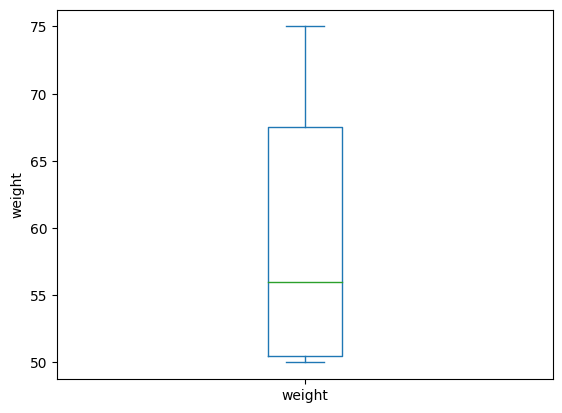

In [ ]:
ax=(df['weight']).plot.box()
ax.set_ylabel('weight')

La mediana es fa servir per designar el valor situat al centre d’un conjunt de dades, ordenades de menor a major, i que té la mateixa quantitat de dades tant per sobre com per sota. La mediana de weight, línia verda,  és en aquest cas 55 (la meitat dels valors de weight es troben entre 50 i 67). El valor superior de la caixa és el percentil 75, i la part inferior de la caixa és el percentil 25.

Si volem dibuixar un histograma; cal obtenir la taula de freqüències, la freqüència s'asigna a un interval amb pandas.cut i counts permet obtenir la taula.

In [ ]:
binnedweight=pd.cut(df['weight'], 10)
binnedweight.value_counts()

(49.975, 52.5]    3
(57.5, 60.0]      1
(67.5, 70.0]      1
(72.5, 75.0]      1
(52.5, 55.0]      0
(55.0, 57.5]      0
(60.0, 62.5]      0
(62.5, 65.0]      0
(65.0, 67.5]      0
(70.0, 72.5]      0
Name: weight, dtype: int64

La freqüència és gran en l'interval (49.975, 52.5)

Text(0.5, 0, 'weight')

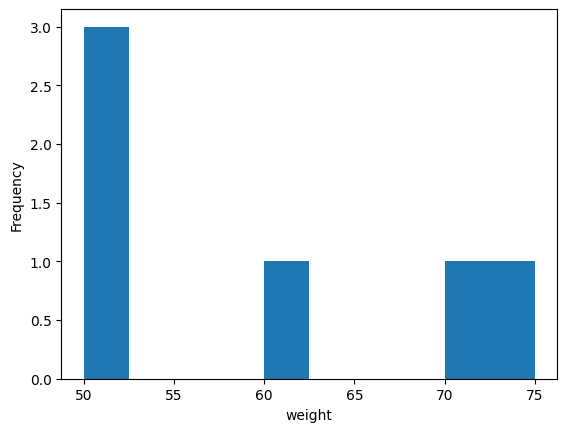

In [ ]:
ax=(df['weight']).plot.hist()
ax.set_xlabel('weight')

# 2.4 Lectura recomanada

Després de la lectura d'aquest quadern, es recomana la lectura de P. Carmona "Data Visualization con Pandas y Matplotlib" a l'enllaç (https://medium.com/ironhack/data-visualization-con-pandas-y-matplotlib-7f1358be6764)
L'objectiu és veure com P. Carmona utilitza el fitxer de dades "Food Reference.csv" de Kaggle, i explica funcionalitats bàsiques per a la representació gràfica amb la llibreria MATPLOTLIB.

# 2.5 Referències

REFERÊNCIES.

FILTRAR.

DelfStack. "Pandas loc vs. iloc". 2021. A URL:
(https://www.delftstack.com/es/howto/python-pandas/pandas-loc-vs-iloc-python/).
Darrera visita 14/2/2024

NETEJAR DATAFRAME

P. Carmona. " Data Cleaning con Pandas. Parte 2". 2020. A  URL:
(https://medium.com/ironhack/data-cleaning-con-pandas-parte-2-a4e1f55e446b)
Darrera visita 14/2/2024

En aquest estil de referència, s'ha posat nom i cognom, el nom del treball que s'està citant. La data de publicació, el lloc web que s'ha consultat, i el dia que s'ha fet la darrera visita al lloc.

Quan es tenen moltes referències es poden per ordre d'aparició en el text, en forma de [1], [2], o bé ordenar la llista de referències per el cognom de l'autor citat.